# Ex1. Linear Regression
## Part 1: linear regression with one variable

1. load packages and dataset
2. EDA
3. visualization
4. gradient descent
5. batch gradient descent
6. get the best values of parameters and fit the line


### <font color="red">first, load the necessary packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### <font color="red">load the dataset

In [55]:
path = 'ex1data1.txt'
data1 = pd.read_csv(path,header = None,names = ['population','profit'])

In [56]:
data1.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### <font color="red">take an overall look at the data

In [4]:
data1.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### <font color="red">create a 2-d scatter plot to visualize the data

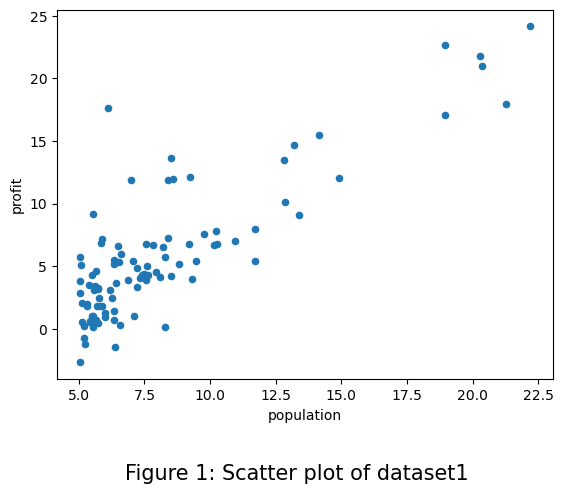

In [5]:
data1.plot(kind = 'scatter',x='population',y='profit')
plt.figtext(0.5, -0.1, "Figure 1: Scatter plot of dataset1", wrap=True, 
            horizontalalignment='center', fontsize=15)
plt.show()

### <font color ='red'> Gradient descent

1. cost function
2. partial derivative
3. get the best w and b

In [19]:
def costFunction(x,y,theta):
    return  sum(((x * theta.T) - y) ** 2) / (2 * len(x))
                                 

In [20]:
data = pd.DataFrame(data1)
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.insert(0,'ones',1)

NameError: name 'data' is not defined

In [22]:
data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [23]:
x = data.iloc[:,0:2].values
y = data.iloc[:,1].values.reshape(-1,1)

In [24]:
theta = np.zeros((2,1))
theta

array([[0.],
       [0.]])

In [25]:
x.shape,y.shape,theta.shape

((97, 2), (97, 1), (2, 1))

In [26]:
costFunction(x,y,theta)

array([40.70197141, 40.70197141])

In [4]:
# 网上给的参考答案
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]#X是所有行，最后一列

X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

X.shape, theta.shape, y.shape

computeCost(X, y, theta)

32.072733877455676

In [14]:
# 自己的代码整合

def costFunction(x,y,theta):
    return  sum(   np.power(((x @ theta) - y),2))      / (2 * len(x))

data = pd.DataFrame(data1)
data.head()

data.insert(0,'ones',1)

x = data.iloc[:,0:2].values
y = data.iloc[:,2].values.reshape(-1,1)


theta = np.zeros((2,1))
theta

x.shape,y.shape,theta.shape

costFunction(x,y,theta)

array([32.07273388])

### <font color='red'> batch gradient descent

In [15]:
def batch_gradient_descent(x,y,theta,alpha,iters):
    costs = []

    for i in range(iters):
        theta = theta - (x.T@ (x@ theta- y))*alpha / len(x)
        cost = costFunction(x,y,theta)
        costs.append(cost)

        if i % 100 == 0:
            print(cost)
    return theta,costs
    

In [16]:
alpha = 0.02
iters = 2000

In [17]:
theta,costs = batch_gradient_descent(x,y,theta,alpha,iters)

[16.76964237]
[5.17066809]
[4.81384022]
[4.6405596]
[4.55641211]
[4.51554891]
[4.49570517]
[4.48606877]
[4.4813892]
[4.47911673]
[4.47801319]
[4.4774773]
[4.47721706]
[4.47709068]
[4.47702931]
[4.47699951]
[4.47698504]
[4.47697801]
[4.4769746]
[4.47697294]


In [18]:
theta

array([[-3.8928815 ],
       [ 1.19274237]])

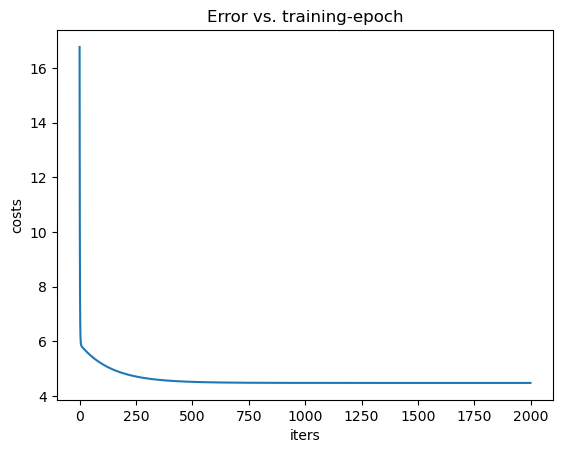

In [21]:
fig,ax = plt.subplots()
ax.plot(np.arange(iters),costs)
ax.set(xlabel='iters',
      ylabel='costs',
      title='Error vs. training-epoch')
plt.show()

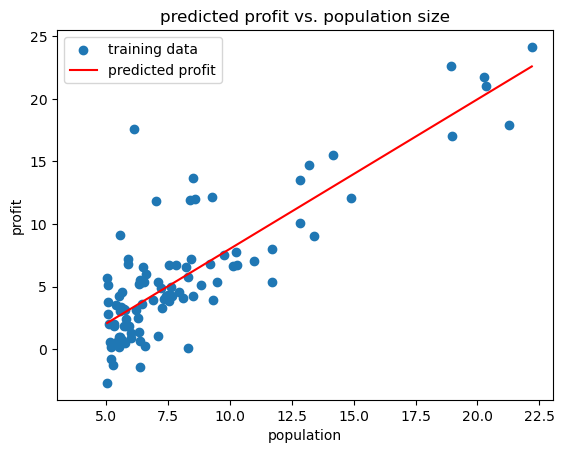

In [43]:
x = np.linspace(data.population.min(),data.population.max(),100)
y_hat = theta[0,0] + theta[1,0] * x


fig,ax = plt.subplots()
ax.scatter(data.population,data.profit,label='training data')
ax.set(xlabel='population',
      ylabel='profit',
      title='predicted profit vs. population size')
ax.plot(x,y_hat,'r',label='predicted profit')
ax.set_xlim(left=3)
ax.legend(loc=2)
plt.show()

## Part 2: multiple linear regression

### <font color='red'> load the data

In [2]:
path2 = 'ex1data2.txt'
data2 = pd.read_csv(path2,header=None,names = ['size','bedrooms','price'])
data2.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### <font color='red'> feature rescaling 

In [3]:
def normalize_feature(data):
    return (data-data.mean())/data.std()

In [4]:
data2 = normalize_feature(data2)

In [5]:
data2.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


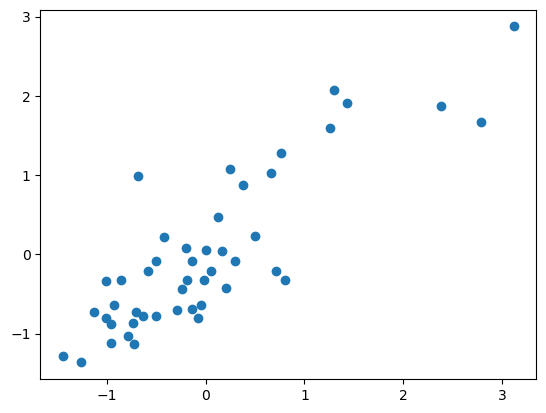

In [6]:
fig,ax = plt.subplots()
ax.scatter(data2['size'],data2['price'])
plt.show()

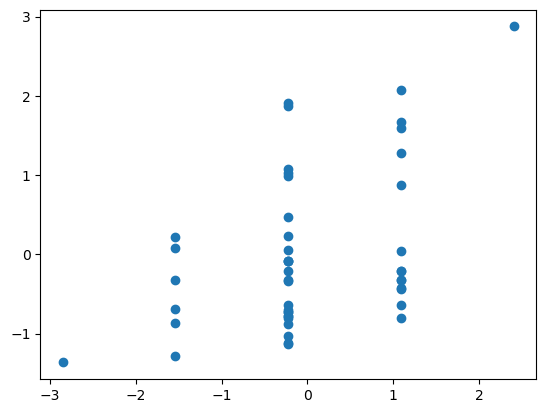

In [7]:
fig,ax = plt.subplots()
ax.scatter(data2['bedrooms'],data2['price'])
plt.show()

In [6]:
data2.insert(0,'ones',1)
data2.head()

,ones,size,bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [7]:
X = data2.iloc[:,0:-1]
X.head()

,ones,size,bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [8]:
y = data2.iloc[:,-1]
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: price, dtype: float64

In [9]:
X = X.values
X.shape

(47, 3)

In [18]:
y = y.values
y.shape

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [16]:
y = y.reshape(47,1)
y.shape

(47, 1)

In [19]:
def costFunction(X,y,theta):
    error = X @ theta - y
    inner = np.power((error),2)
    return np.sum(inner)/(2*len(X))

In [21]:
theta = np.zeros((3,1))
theta

array([[0.],
       [0.],
       [0.]])

In [22]:
cost_init = costFunction(X,y,theta)
cost_init

0.48936170212765967

In [32]:
def gradient_descent(X,y,theta,alpha,iters):
    costs = []
    for i in range(iters):
        theta = theta - alpha * (X.T @ (X @ theta -y))/len(X)
        cost = costFunction(X,y,theta)
        costs.append(cost)

    if i % 100 == 0:
        print(cost)
    return theta,costs

In [38]:
alpha_candidate = [0.1,0.01,0.001,0.0001,0.3,0.03,0.003,0.0003]
iters = 2000

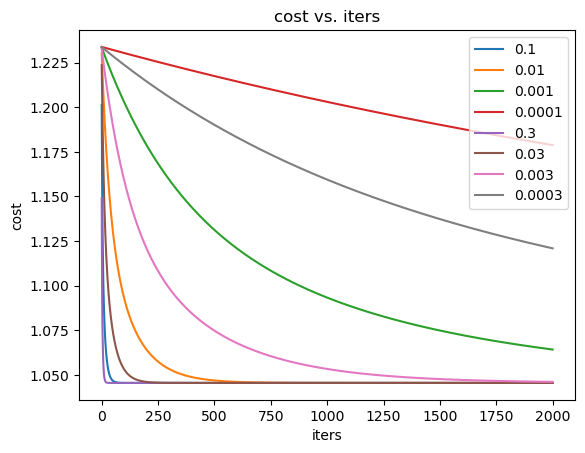

In [41]:
fig,ax = plt.subplots()

for alpha in alpha_candidate:
    _,costs = gradient_descent(X,y,theta,alpha,iters)
    ax.plot(np.arange(iters),costs,label = alpha)
    ax.legend()

ax.set(xlabel = 'iters',
      ylabel= 'cost',
      title='cost vs. iters')
plt.show()

In [42]:
from sklearn import linear_model

In [57]:
data1.insert(0,'ones',1)
x = data1.iloc[:,0:-1]
y = data1.iloc[:,-1]

In [58]:
x = x.values
x.shape

(97, 2)

In [59]:
y = y.values.reshape(97,1)
y.shape

(97, 1)

In [60]:
theta = np.zeros((2,1))

In [61]:
model = linear_model.LinearRegression()

In [62]:
model.fit(x,y)

LinearRegression()

In [63]:
f = model.predict(x).flatten()

In [64]:
f

array([ 3.39377399,  2.6989512 ,  6.26719552,  4.45927234,  3.09515767,
        6.10530086,  5.02381586,  6.33818102,  3.84247394,  2.13452698,
        2.91727635, 13.00234766,  2.94507404,  6.13572322,  2.833764  ,
        2.52202431,  3.69835548,  2.22460102,  3.77494824,  4.53992141,
        3.48802365, 20.28701109,  2.65409313,  3.65146926,  2.74333205,
       18.70624151, 11.40845471,  9.17628876, 11.82363042, 22.59314512,
        2.37050903,  3.96559502,  7.13763287,  3.13333475,  5.90033768,
        5.56903223,  5.7629002 ,  2.79272364, 11.41799898,  3.68403908,
        2.55483273,  4.31527318, 10.07225703,  2.99243747,  5.43934948,
        4.56652606,  2.1531383 ,  3.02548451, 10.06271276,  2.71553436,
        5.09993141,  2.43648379,  4.96118159,  5.17497322,  3.65946258,
        3.69060076,  3.58955081,  2.83257096,  7.21160096,  7.38268198,
        6.63321825,  2.28329828, 21.49078204, 13.88996469, 18.72294398,
        4.71577457,  6.0005525 ,  8.3161115 ,  2.66518834, 20.37

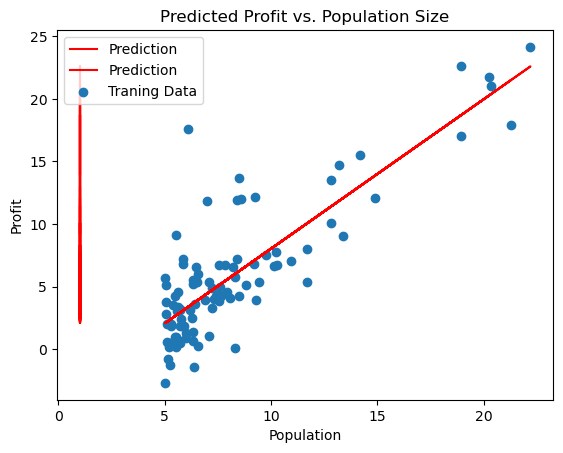

In [67]:
fig, ax = plt.subplots()
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data1.population, data1.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted  Profit vs. Population Size')
plt.show()